In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

#### Load the data

In [2]:
data = pd.read_csv("E:\Courses\Data science(ETLHive)\dataset\heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Check Data for any missing values

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

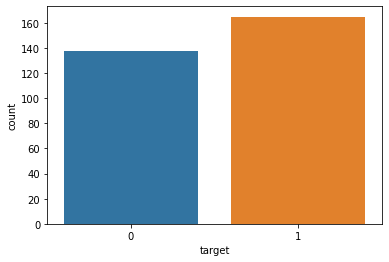

In [5]:
sns.countplot(data["target"])

In [6]:
x = data.iloc[:,4:6]# iloc[:,:](rows,columns)
x

,chol,fbs
0,233,1
1,250,0
2,204,0
3,236,0
4,354,0
...,...,...
298,241,0
299,264,0
300,193,1
301,131,0


In [7]:
#Get Target data 
y = data['target']

#Load X Variables into a Pandas Dataframe with columns 
X = data.drop(['target'], axis = 1)# axis  = 1 for columns

### Divide Data into Train and test

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [9]:
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (242, 13)
y_train : (242,)
X_test : (61, 13)
y_test : (61,)


### Building model with using default parameters

In [10]:
rfc=RandomForestClassifier(n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt')
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [11]:
y_pred=rfc.predict(X_test)

In [12]:
from sklearn.metrics import classification_report

In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.74      0.81        31
           1       0.77      0.90      0.83        30

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



### Build Random Forest Model with hyperparameters

In [14]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# criterion
criteria = [ 'gini','entropy']

In [15]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [16]:
rf_Model = RandomForestClassifier()

In [17]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [18]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157,
                                          178, 200]},
             verbose=2)

In [19]:
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 31}

In [34]:
rfc=RandomForestClassifier(bootstrap= False,
 max_depth= 2,
 max_features='sqrt',
 min_samples_leaf=1,
 min_samples_split= 5,
 n_estimators= 31)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80        31
           1       0.76      0.93      0.84        30

    accuracy                           0.82        61
   macro avg       0.84      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61



* https://www.analyticsvidhya.com/blog/2021/04/getting-into-random-forest-algorithms/
* https://medium.com/swlh/random-forest-ac5227dabb08
* https://www.kdnuggets.com/2022/08/tuning-random-forest-hyperparameters.html
* https://www.kaggle.com/code/arjunprasadsarkhel/simple-random-forest-with-hyperparameter-tuning